# Plot fig. 7.20

Author: Bill Collins (UK)
Adapted by Chris Smith

Theme Song: Untitled #7<br>
Artist: Sigur Rós<br>
Album: ()<br>
Released: 2002

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from fair.defaults.carbon import a, tau
from ar6.constants.gases import lifetimes, radeff
from ar6.metrics import co2_analytical, ch4_analytical, halogen_analytical

from fair.constants import molwt
from fair.constants.general import M_ATMOS
from fair.forcing.ghg import meinshausen

In [2]:
pl.rcParams['figure.figsize'] = (18/2.54, 12.5/2.54)
pl.rcParams['font.size'] = 9
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

In [3]:
ghg_obs = pd.read_excel('../data_input/observations/LLGHG_history_AR6_v9_updated.xlsx', skiprows=22, sheet_name="MR_output", index_col=0)
for addyear in range(1751,1850):
    ghg_obs.loc[addyear, 'YYYY'] = np.nan
ghg_obs = ghg_obs.sort_index()
ghg_obs = ghg_obs.interpolate()

#co2_pi
co2_0 = ghg_obs.loc[1750,'CO2']
ch4_0 = ghg_obs.loc[1750,'CH4']
n2o_0 = ghg_obs.loc[1750,'N2O']

#co2_2019
co2 = ghg_obs.loc[2019,'CO2']
ch4 = ghg_obs.loc[2019,'CH4']
n2o = ghg_obs.loc[2019,'N2O']

In [4]:
co2, ch4, n2o

(409.85, 1866.3274999999999, 332.091)

In [5]:
alpha_ch4 = lifetimes['CH4']
alpha_n2o = lifetimes['N2O']
alpha_co2 = tau

#AR6 impulse numbers Appendix 7.A.2: Zeb Nicholls 21.02.2021 after F2x revision to 3.93
q = np.array([0.443767729, 0.31959105])
d = np.array([3.424102092, 285.0034778])

# Tropospheric rapid adjustments
co2_ra = 0.05  # section 7.3.2
ch4_ra = -0.14  # section 7.3.2
n2o_ra = 0.07  # section 7.3.2
cfc_ra = 0.12 # section 7.3.2
halo_ra = 0.  # section 7.3.2

# Fractional uncertainties
err_co2 = 0.12
err_ch4 = 0.2
err_n2o = 0.16

f_ch4_o3 = 0.29 # Thornhill
f_ch4_h2o = 0.1 # Thornhill
f_n2o_o3 = 0.15 # Thornhill
f_n2o_ch4 = -1.6 # Thornhill

In [6]:
co2_analytical(100, co2=409.85, ch4=1866.3275, n2o=332.091, co2_ra=0.05, d=d, q=q, a=a, alpha_co2=alpha_co2)

(6.997171637015099e-16,
 8.947603325315803e-14,
 3.960979482030872e-16,
 4.357583304280592e-14)

In [7]:
ch4_analytical(100, co2=409.85, ch4=1866.3275, n2o=332.091, ch4_ra=-0.14, d=d, q=q, alpha_ch4=11.8, f_ch4_o3=0.29, f_ch4_h2o=0.1)

(5.2960251641201065e-17,
 2.9936643688168606e-12,
 2.498531506999455e-15,
 1.5824728416188718e-12)

In [8]:
halogen_analytical(100, lifetimes['HFC-32'], radeff['HFC-32'], molwt.HFC32, halogen_ra=0)

(1.0959014018427118e-19,
 6.526128847705138e-11,
 6.067152388569625e-14,
 3.3792902982629074e-11)

/nfs/b0110/Users/mencsm/miniconda3/envs/ar6/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


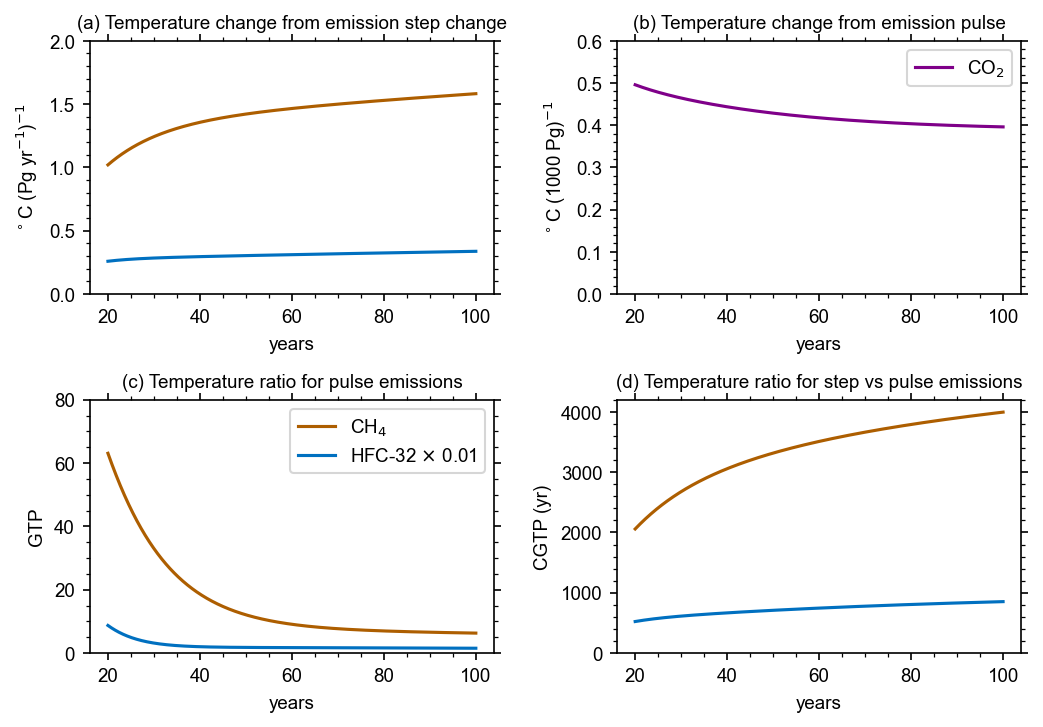

In [9]:
dts = 0.1
lamb = np.sum(q)
H = np.arange(0, 100.+dts, dts)

rf_co2, agwp_co2, delT_co2, idelT_co2 = co2_analytical(H, co2=409.85, ch4=1866.3275, n2o=332.091, co2_ra=0.05, d=d, q=q, a=a, alpha_co2=alpha_co2)
rf_ch4, agwp_ch4, delT_ch4, idelT_ch4 = ch4_analytical(H, co2=409.85, ch4=1866.3275, n2o=332.091, ch4_ra=-0.14, d=d, q=q, alpha_ch4=11.8, f_ch4_o3=0.29, f_ch4_h2o=0.1)
rf_hfc32, agwp_hfc32, delT_hfc32, idelT_hfc32 = halogen_analytical(H, lifetimes['HFC-32'], radeff['HFC-32'], molwt.HFC32, halogen_ra=0)
gwp_ch4 = agwp_ch4/agwp_co2

colors = {
    'co2': '#7f0089',
    'ch4': '#ad5e00',
    'other_wmghg': '#0070c0',
}

fig, ax = pl.subplots(2, 2)

ax[0,0].plot(H[200:], idelT_ch4[200:]*1e12, color=colors['ch4'])
ax[0,0].plot(H[200:], 0.01*idelT_hfc32[200:]*1e12, color=colors['other_wmghg'])
ax[0,0].set_xlabel('years')
ax[0,0].set_ylabel(r'$^\circ$C (Pg yr$^{-1}$)$^{-1}$')
ax[0,0].set_ylim(0., 2)
ax[0,0].set_title(r'(a) Temperature change from emission step change', fontsize=9)

ax[0,1].plot(H[200:], delT_co2[200:]*1e15, color=colors['co2'], label='CO$_2$')
ax[0,1].set_xlabel('years')
ax[0,1].set_ylabel(r'$^\circ$C (1000 Pg)$^{-1}$')
ax[0,1].set_ylim(0, 0.6)
ax[0,1].set_title(r'(b) Temperature change from emission pulse', fontsize=9)
ax[0,1].legend()

ax[1,1].plot(H[200:], idelT_ch4[200:]/delT_co2[200:], color=colors['ch4'])
ax[1,1].plot(H[200:], 0.01*idelT_hfc32[200:]/delT_co2[200:], color=colors['other_wmghg'])
ax[1,1].set_xlabel('years')
ax[1,1].set_ylabel(r'CGTP (yr)')
ax[1,1].set_ylim(0, 4200)
# plt.yticks([0, 1000, 2000, 3000, 4000])
ax[1,1].set_title(r'(d) Temperature ratio for step vs pulse emissions', fontsize=9)

ax[1,0].plot(H[200:], delT_ch4[200:]/delT_co2[200:], label='CH$_4$', color=colors['ch4'])
ax[1,0].plot(H[200:], 0.01*delT_hfc32[200:]/delT_co2[200:], label=r'HFC-32 $\times$ 0.01', color=colors['other_wmghg'])
ax[1,0].set_xlabel('years')
ax[1,0].set_ylim(0, 80)
ax[1,0].set_title(r'(c) Temperature ratio for pulse emissions', fontsize=9)
ax[1,0].legend()
ax[1,0].set_ylabel(r'GTP')
fig.tight_layout()

pl.savefig('../figures/fig7.21.pdf')
pl.savefig('../figures/fig7.21.png', dpi=300)